### Importing Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

### Load Income Dataset

In [2]:
Income = pd.read_csv('income_evaluation.csv')
pd.set_option('display.max_columns', None)
Income.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Renaming Columns of Dataset

In [3]:
# Renaming Columns to their appropriate Names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship','race',
             'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
Income.columns = col_names

col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

### Dataset Profiling

In [4]:
print("Dataset dimension :", Income.ndim)
print("Dataset shape :", Income.shape)
print("Dataset size :", Income.size)

Dataset dimension : 2
Dataset shape : (32561, 15)
Dataset size : 488415


In [5]:
income_types = Income.dtypes.reset_index()
income_types.columns = ['Features','Data Type']
income_types

,Features,Data Type
0,age,int64
1,workclass,object
2,fnlwgt,int64
3,education,object
4,education-num,int64
5,marital-status,object
6,occupation,object
7,relationship,object
8,race,object
9,sex,object


### Dataset Inspection 

### Checking For Missing and Blank Values

In [6]:
miss_data = Income.isnull().sum().reset_index()
miss_data.columns = ['Features','Missing Values']
blank_data = Income.apply(lambda x: x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(miss_data,blank_data, on=['Features'])
merged_data['Filling Factor'] = (Income.shape[0]-miss_data['Missing Values'] + Income.shape[0]-blank_data['Blank Values'])/Income.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending = True)

,Features,Missing Values,Blank Values,Filling Factor
0,age,0,0,100.0
1,workclass,0,0,100.0
2,fnlwgt,0,0,100.0
3,education,0,0,100.0
4,education-num,0,0,100.0
5,marital-status,0,0,100.0
6,occupation,0,0,100.0
7,relationship,0,0,100.0
8,race,0,0,100.0
9,sex,0,0,100.0


### Cross Checking Missing Values with ASSERT Statement

In [7]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Income).all().all()

Interpretation
 - The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.
 - All the values are greater than or equal to zero excluding character values.

### Dataset Overview

In [8]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Income)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education-num      int64           16          0
                        marital-status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital-gain      int64          119          0
                          capital-loss      int64    

### Explore Categorical Variables

In [9]:
categorical = [var for var in Income.columns if Income[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


### Categorical Variables Distinct Values Distribution

In [10]:
for var in categorical: 
    
    print(Income[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Takeaways
 - Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values.
 - Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().
 - But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it does not consider ? as missing values.
 - So, I have to replace ? with NaN so that Python can detect these missing values.
 - I will explore these variables and replace ? with NaN.

### Data Cleaning 

### Workclass Feature Missing Values Handling

In [11]:
# Replace '?' values in workclass variable with `NaN`
Income['workclass'].replace(' ?', np.NaN, inplace=True)

# Replace Nan to value type occurs more frequently than others
Income['workclass'] = Income['workclass'].fillna(value='Private')

# Double Checking Missing
WC_fill = Income['workclass'].isnull().sum()

print('Workclass missing value:', WC_fill)

Workclass missing value: 0


In [12]:
# Cross Checking its distinct value
WC_count = Income['workclass'].value_counts().reset_index()
WC_count.columns = ['workclass','Total Count']
WC_count.sort_values(by='Total Count',ascending=False)

,workclass,Total Count
0,Private,22696
1,Self-emp-not-inc,2541
2,Local-gov,2093
3,Private,1836
4,State-gov,1298
5,Self-emp-inc,1116
6,Federal-gov,960
7,Without-pay,14
8,Never-worked,7


### Occupation Feature Missing Values Handling

In [13]:
# Replace '?' values in workclass variable with `NaN`
Income['occupation'].replace(' ?', np.NaN, inplace=True)

# Replace Nan to value type occurs more frequently than others
Income['occupation'] = Income['occupation'].fillna(value='Prof-specialty')

# Double Checking Missing
OC_fill = Income['occupation'].isnull().sum()

print('Occupation missing value:', OC_fill)

Occupation missing value: 0


In [14]:
# Cross Checking its distinct value
OC_count = Income['occupation'].value_counts().reset_index()
OC_count.columns = ['occupation','Total Count']
OC_count.sort_values(by='Total Count',ascending=False)

,occupation,Total Count
0,Prof-specialty,4140
1,Craft-repair,4099
2,Exec-managerial,4066
3,Adm-clerical,3770
4,Sales,3650
5,Other-service,3295
6,Machine-op-inspct,2002
7,Prof-specialty,1843
8,Transport-moving,1597
9,Handlers-cleaners,1370


### Native-country Missing Values Handling

In [17]:
# Replace '?' values in workclass variable with `NaN`
Income['native-country'].replace(' ?', np.NaN, inplace=True)

# Replace Nan to value type occurs more frequently than others
Income['native-country'] = Income['native-country'].fillna(value='United-States')

# Double Checking Missing
NC_fill = Income['native-country'].isnull().sum()

print('Native-country missing value:', NC_fill)

Native-country missing value: 0


In [18]:
# Cross Checking its distinct value
NC_count = Income['native-country'].value_counts().reset_index()
NC_count.columns = ['native-country','Total Count']
NC_count.sort_values(by='Total Count',ascending=False)

,native-country,Total Count
0,United-States,29170
1,Mexico,643
2,United-States,583
3,Philippines,198
4,Germany,137
5,Canada,121
6,Puerto-Rico,114
7,El-Salvador,106
8,India,100
9,Cuba,95


### Exploratory Data

### Dataset Basic Statistic

In [19]:
Income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Numerical Feature Plot

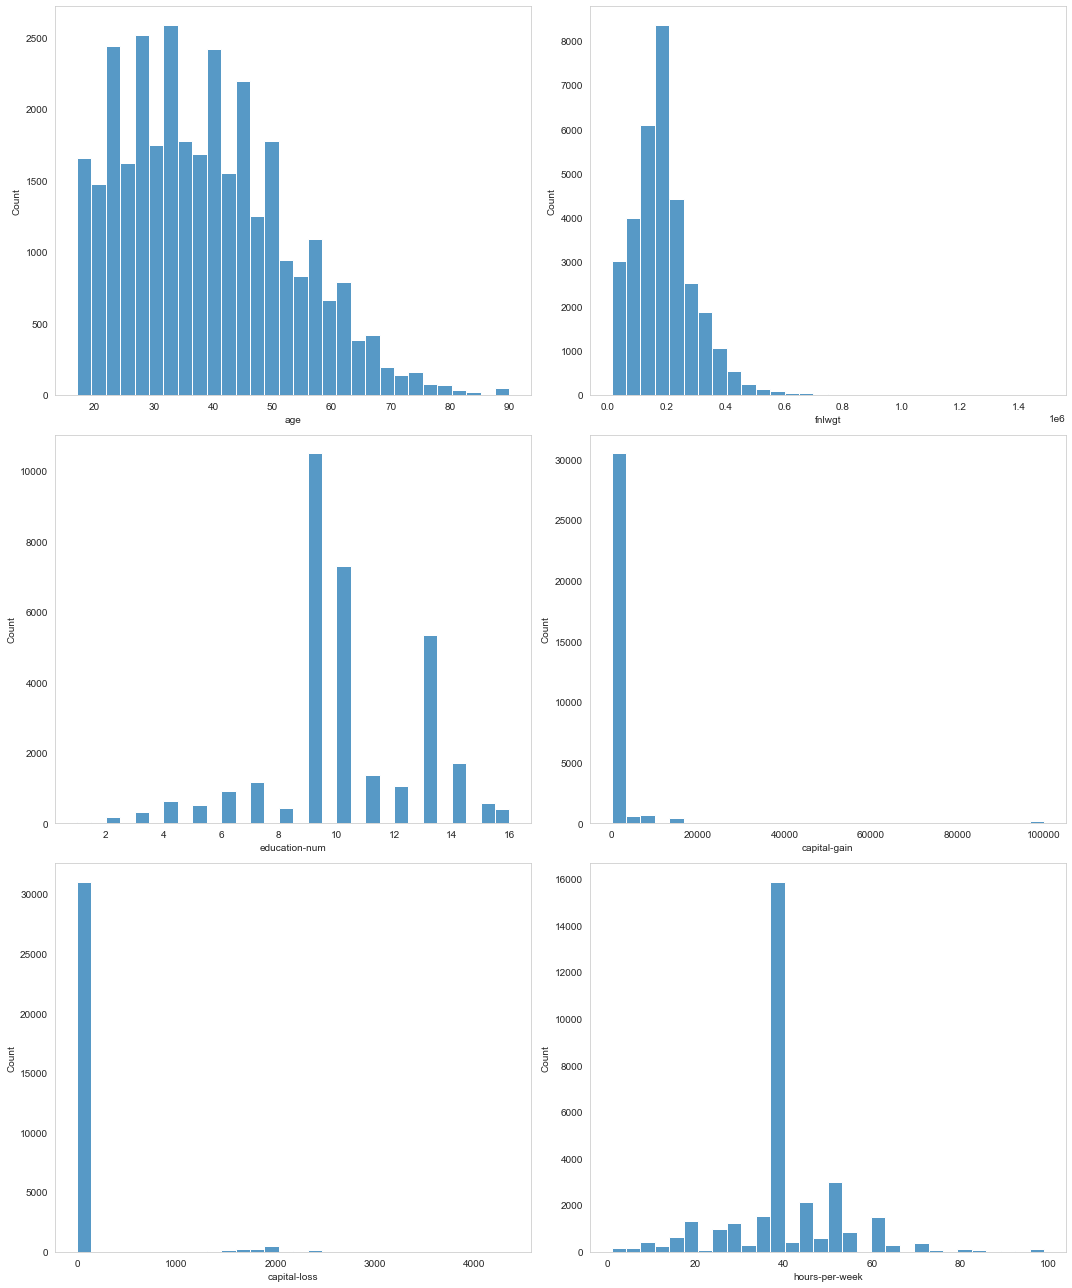

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

Income_num = Income[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

plt.figure(figsize=(15, 18))
for i in range(0, len(list(Income_num))):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=Income[list(Income_num)[i]],bins = 30)
    plt.tight_layout()

### Outliers 

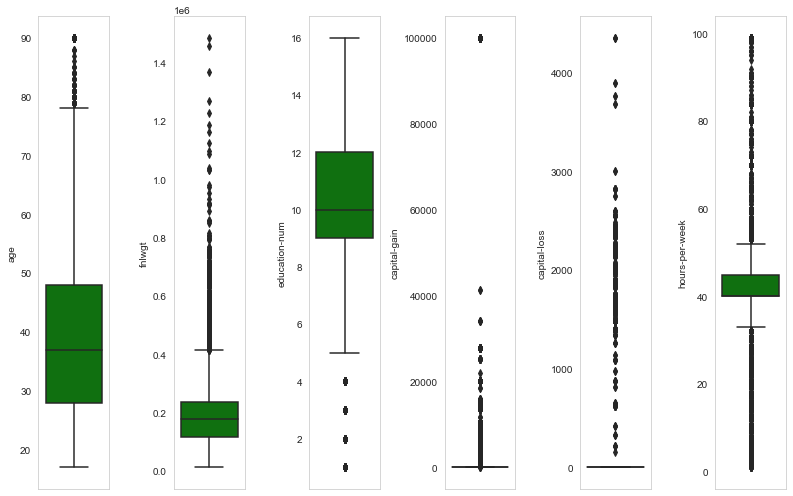

In [21]:
plt.figure(figsize=(13, 7))
for i in range(0, len(list(Income_num))):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=Income[list(Income_num)[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation

In [22]:
# plot correlation heatmap to find out correlations

Income.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education-num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital-gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital-loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours-per-week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


### Occupation and Workclass Distribution

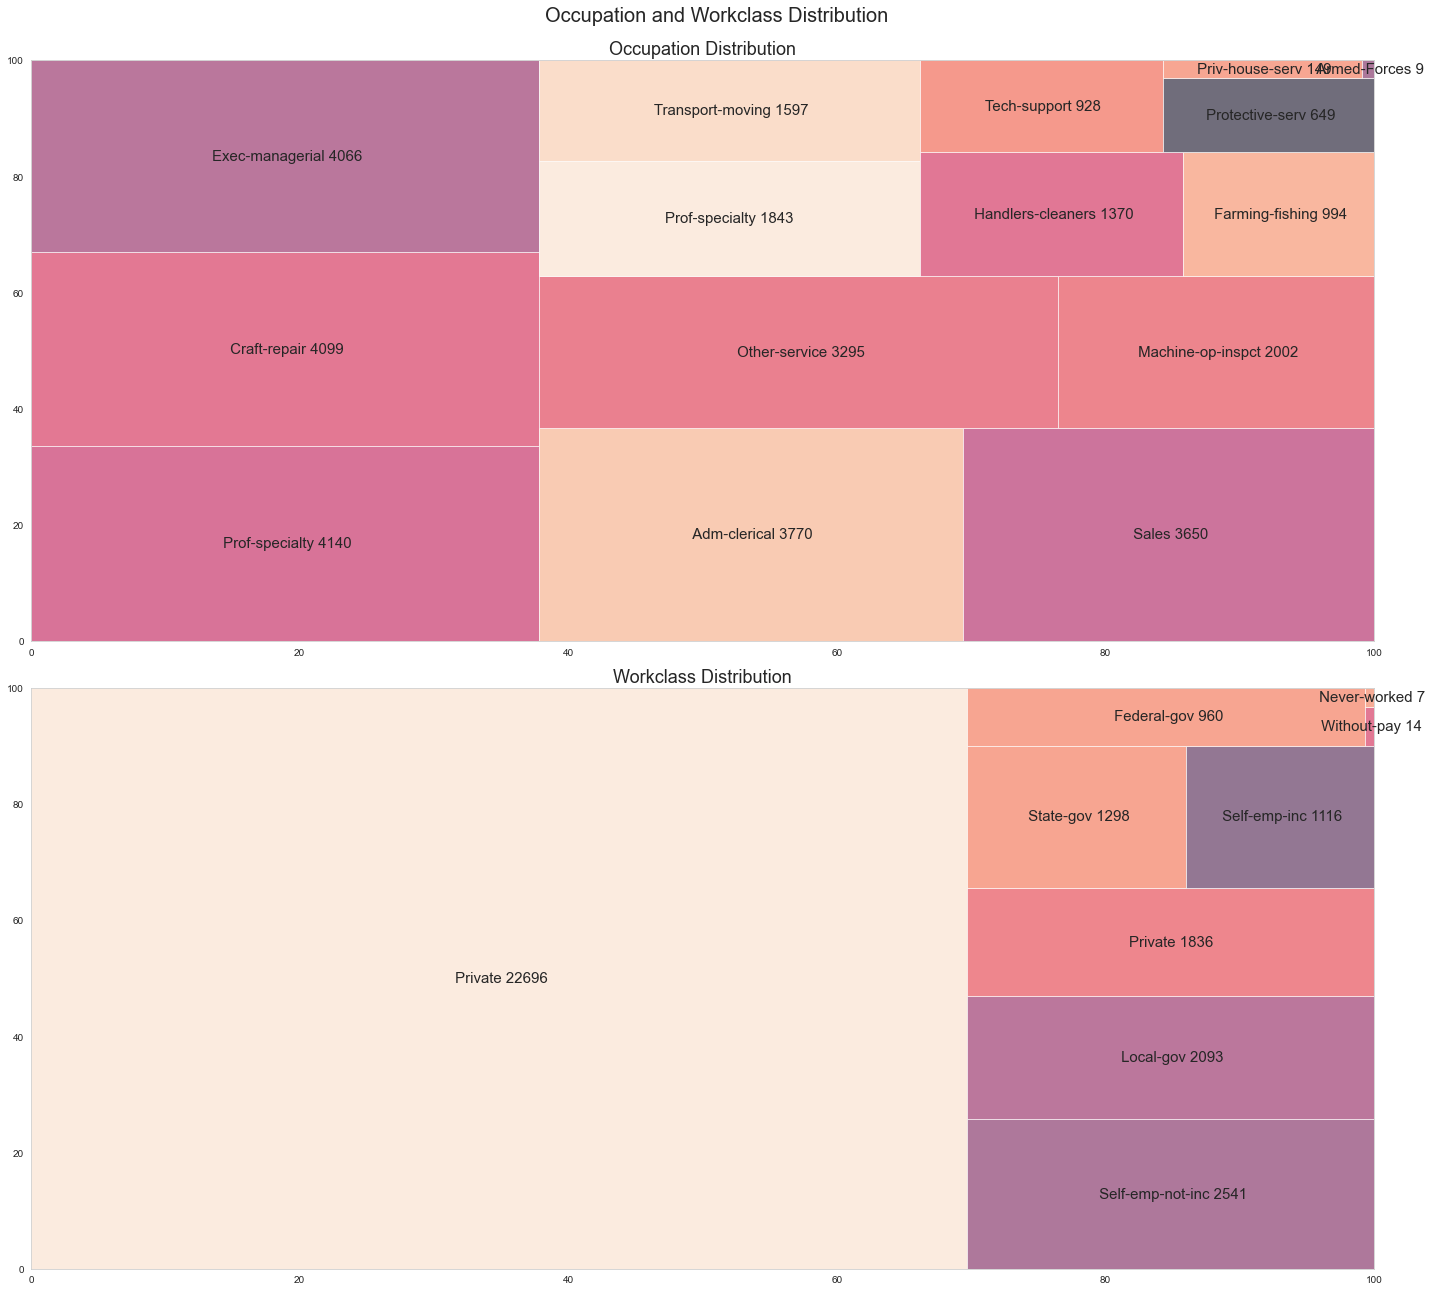

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,18))
fig.suptitle("Occupation and Workclass Distribution", fontsize=20, verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,1,1)
size = Income.groupby('occupation',)['occupation'].count().sort_values(ascending= False).tolist() 
label = Income.groupby('occupation',)['occupation'].count().sort_values(ascending= False).index.values.tolist()
label = [i+" "+j for i, j in zip(label, [str(x) for x in size])]
ax1 = squarify.plot(sizes=size, label=label, alpha=.6, text_kwargs={'fontsize':15})
ax1.set_title('Occupation Distribution', fontsize=18, fontweight='normal')

#Plot 2
plt.subplot(2,1,2)
size2 = Income.groupby('workclass',)['workclass'].count().sort_values(ascending= False).tolist() 
label2 = Income.groupby('workclass',)['workclass'].count().sort_values(ascending= False).index.values.tolist()
label2 = [i+" "+j for i, j in zip(label2, [str(x) for x in size2])]
ax2 = squarify.plot(sizes=size2, label=label2, alpha=.6, text_kwargs={'fontsize':15})
ax2.set_title('Workclass Distribution', fontsize=18, fontweight='normal')

plt.tight_layout()

### Education Distribution

Text(0.5, 1.0, 'Education Distribution')

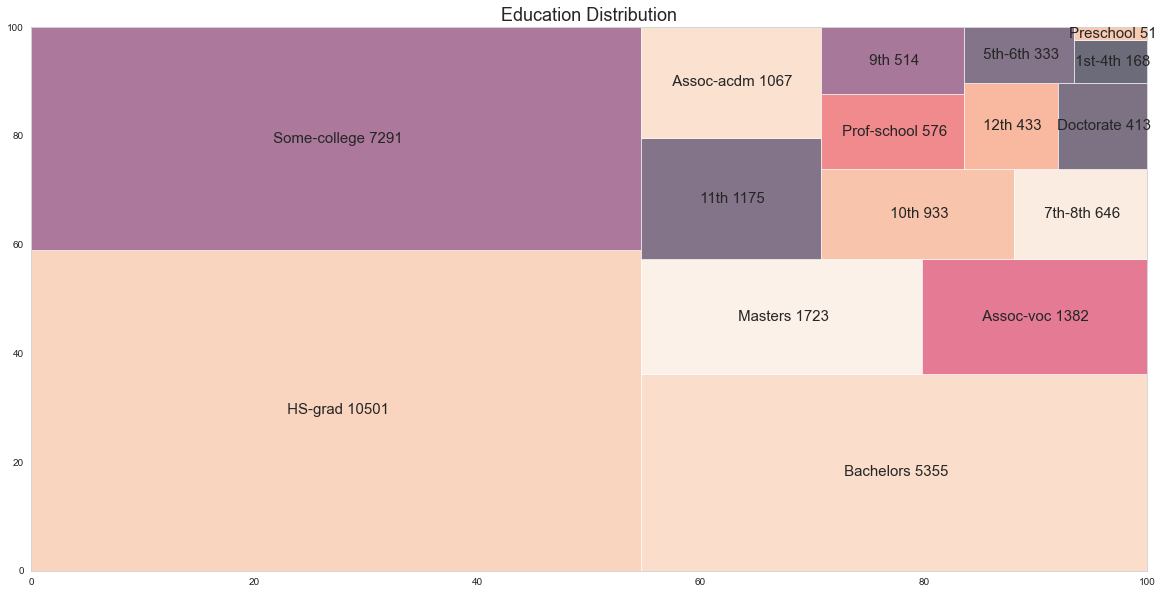

In [24]:
#Plot 3
fig3=plt.figure(figsize=(20,10))
size3 = Income.groupby('education',)['education'].count().sort_values(ascending= False).tolist() 
label3 = Income.groupby('education',)['education'].count().sort_values(ascending= False).index.values.tolist()
label3 = [i+" "+j for i, j in zip(label3, [str(x) for x in size3])]
ax3 = squarify.plot(sizes=size3, label=label3, alpha=.6, text_kwargs={'fontsize':15})
ax3.set_title('Education Distribution', fontsize=18, fontweight='normal')

### Native-country Distribution

Text(0.5, 1.0, 'Native-country Distribution')

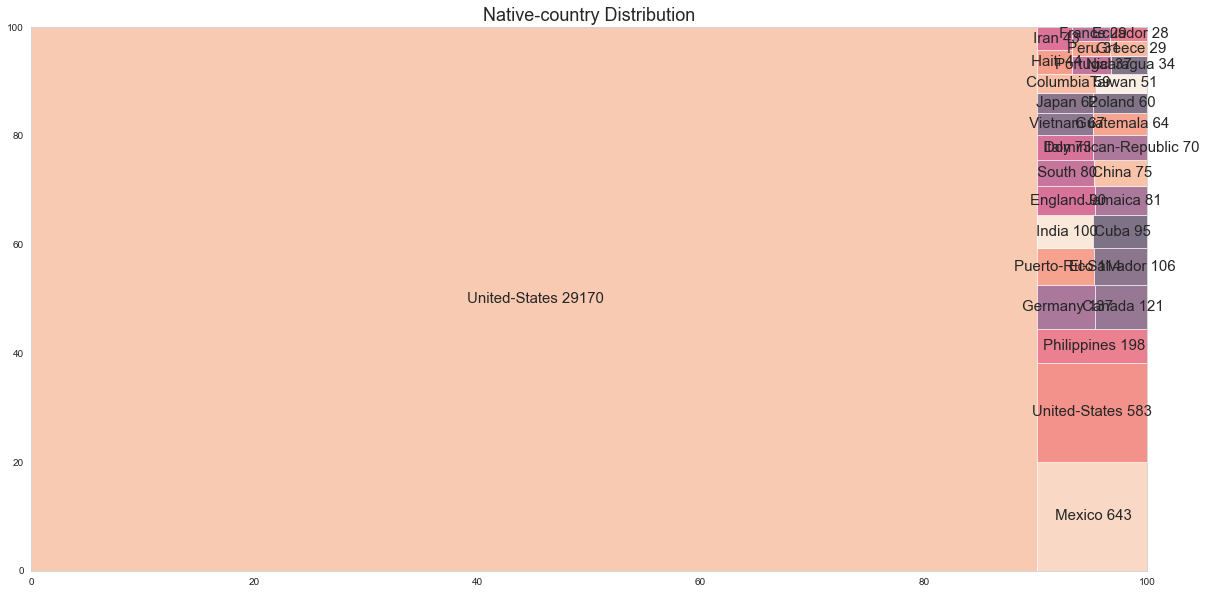

In [25]:
#Plot 4
fig4=plt.figure(figsize=(20,10))
size4 = Income.groupby('native-country',)['native-country'].count().sort_values(ascending= False)[:30].tolist() 
label4 = Income.groupby('native-country',)['native-country'].count().sort_values(ascending= False)[:30].index.values.tolist()
label4 = [i+" "+j for i, j in zip(label4, [str(x) for x in size4])]
ax4 = squarify.plot(sizes=size4, label=label4, alpha=.6, text_kwargs={'fontsize':15})
ax4.set_title('Native-country Distribution', fontsize=18, fontweight='normal')

### Income Disribution

Text(0.5, 1.0, 'Income Distribution')

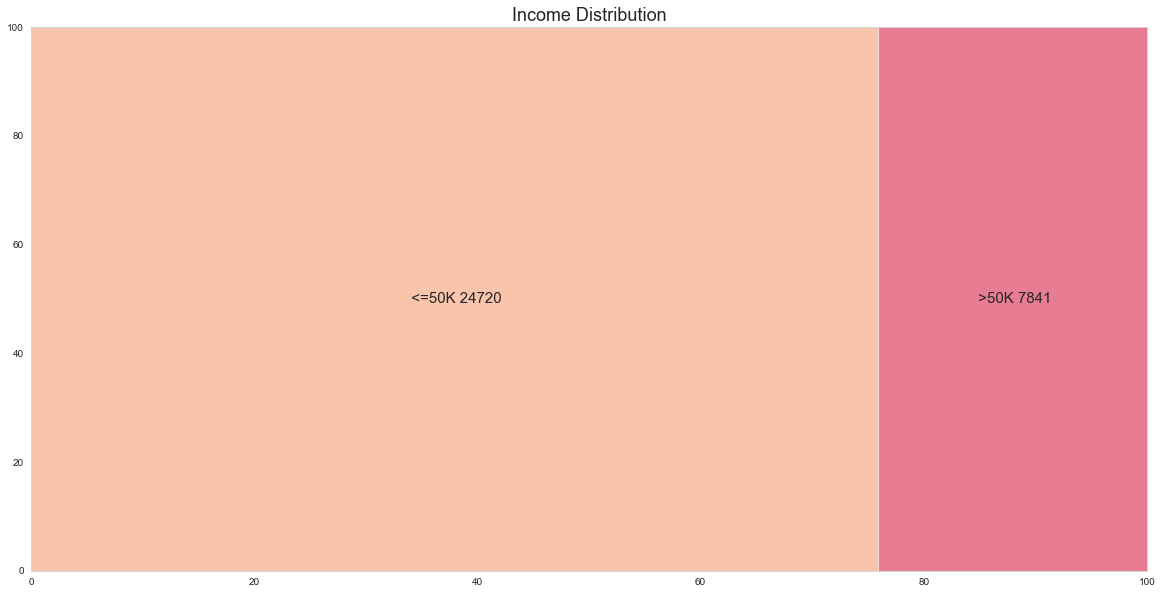

In [26]:
#Plot 5
fig5=plt.figure(figsize=(20,10))
size5 = Income.groupby('income',)['income'].count().sort_values(ascending= False)[:30].tolist() 
label5 = Income.groupby('income',)['income'].count().sort_values(ascending= False)[:30].index.values.tolist()
label5 = [i+" "+j for i, j in zip(label5, [str(x) for x in size5])]
ax5 = squarify.plot(sizes=size5, label=label5, alpha=.6, text_kwargs={'fontsize':15})
ax5.set_title('Income Distribution', fontsize=18, fontweight='normal')

### Categorical Plotting In Respect to Target Feature (Income)

### Frequency Distribution of Income per Education

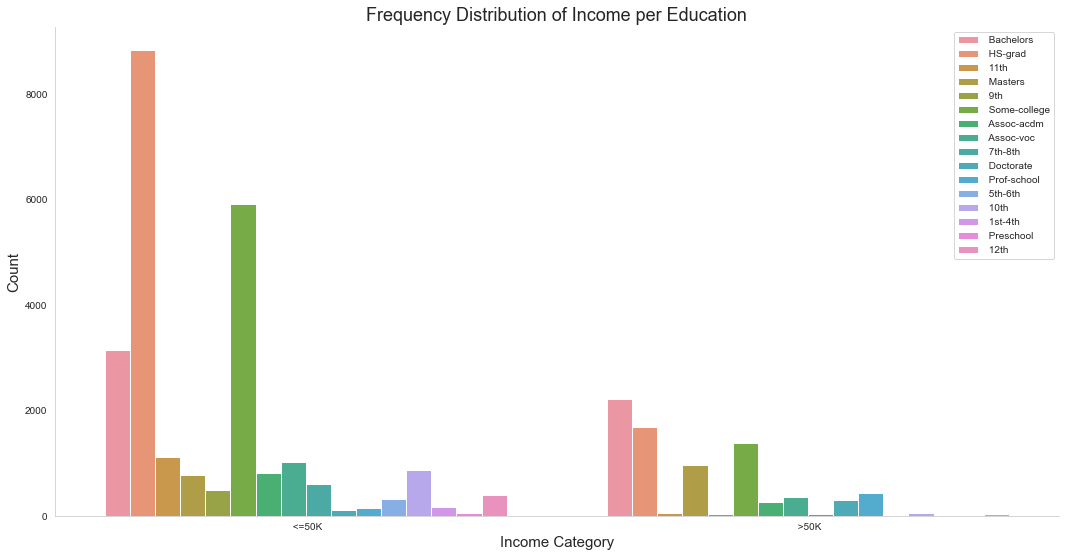

In [27]:
fig12=plt.figure(figsize=(18,9))
ax12 = sns.countplot(x='income', hue='education', data=Income)
ax12.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax12.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.set_title('Frequency Distribution of Income per Education',fontsize=18, fontweight='normal')
ax12.legend(loc='upper right')

### Frequency Distribution of Income Category per Occupation and Workclass

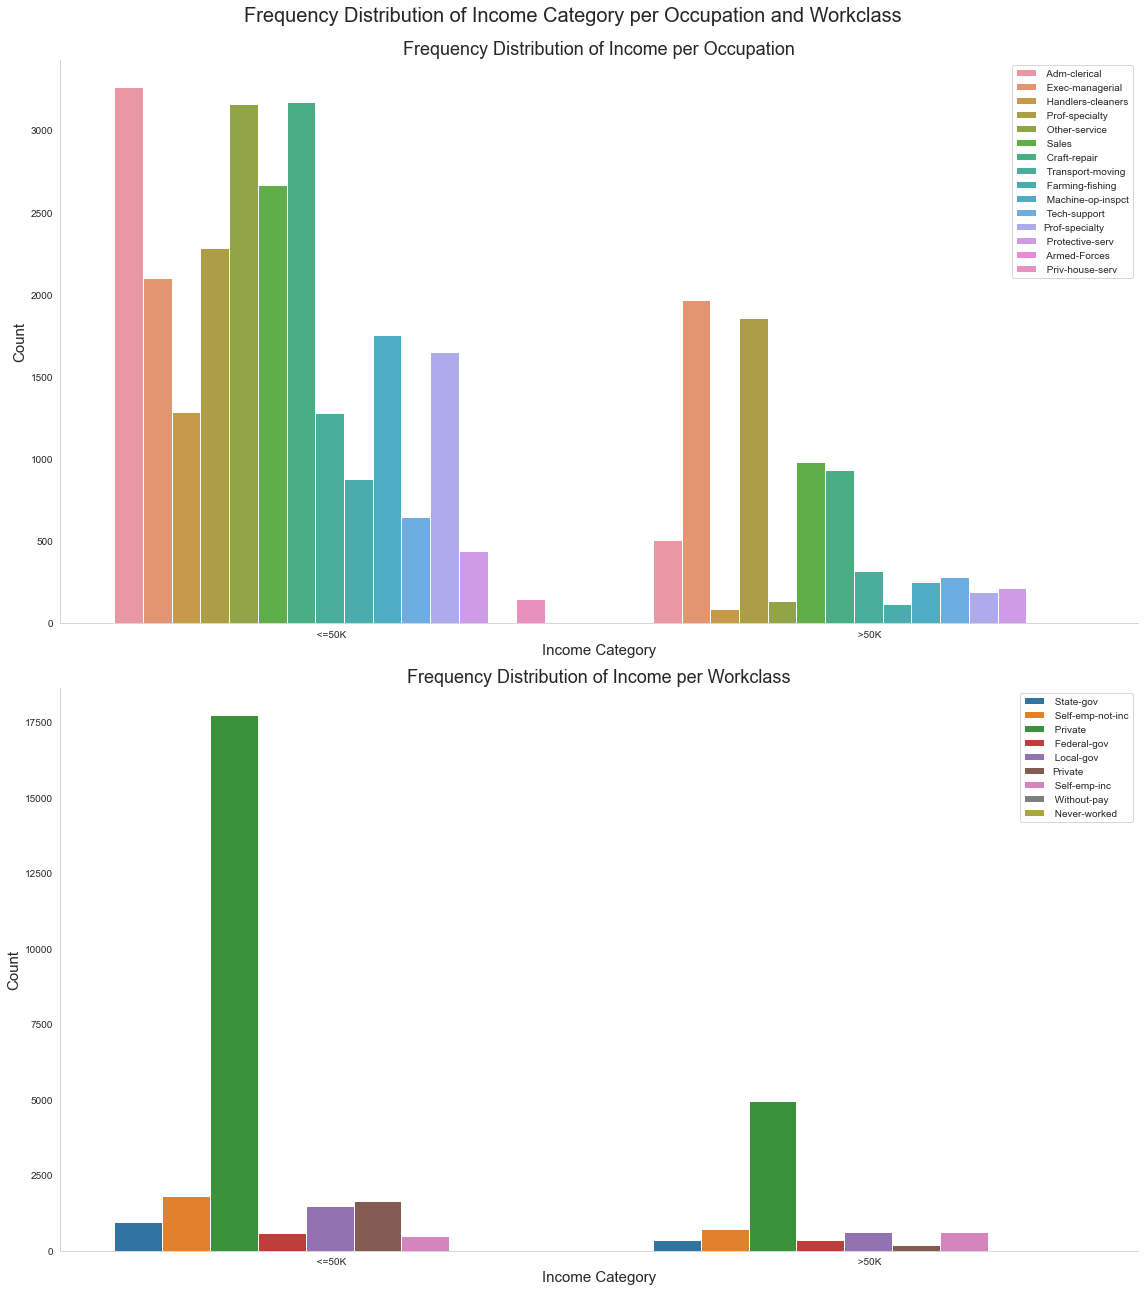

In [28]:
fig, (ax6, ax7) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Income Category per Occupation and Workclass", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax6 = sns.countplot(x='income', hue='occupation',ax=ax6, data=Income)
ax6.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax6.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Frequency Distribution of Income per Occupation',fontsize=18, fontweight='normal')
ax6.legend(loc='best')


#Plot 2
ax7 = sns.countplot(x='income', hue='workclass',ax=ax7, data=Income)
ax7.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax7.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_title('Frequency Distribution of Income per Workclass',fontsize=18, fontweight='normal')
ax7.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Income Category per Sex and Race

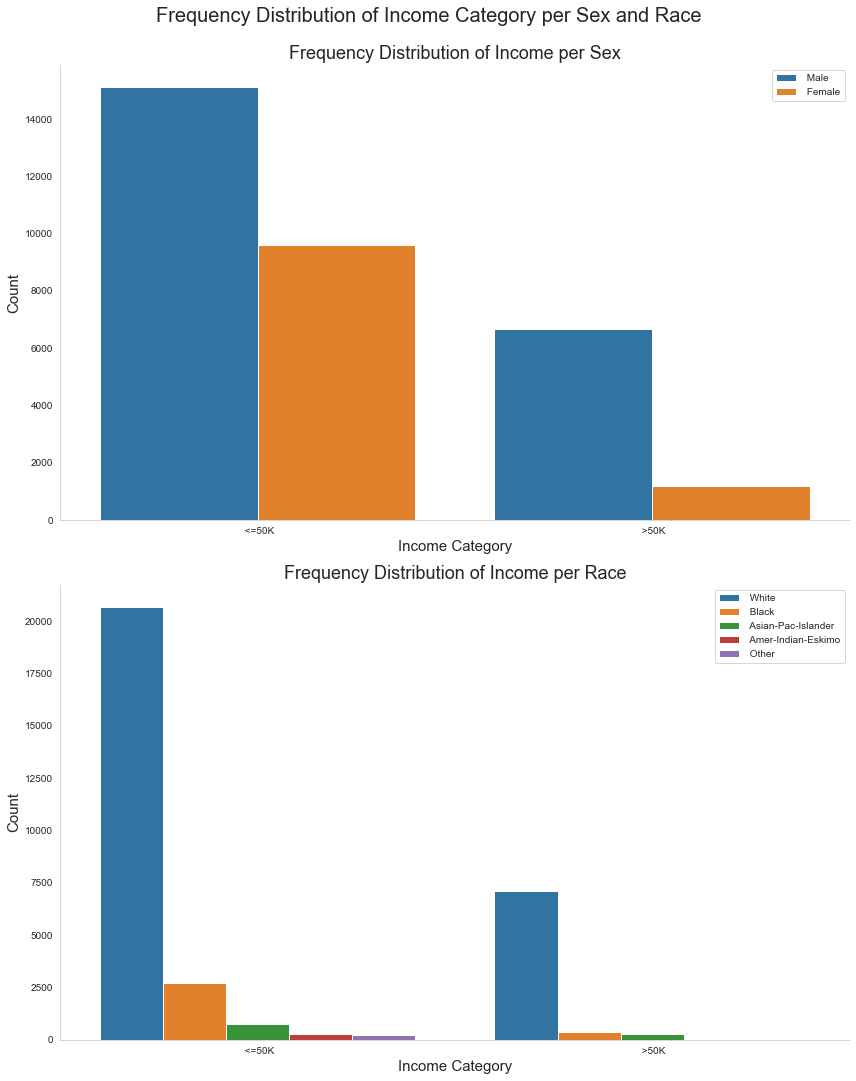

In [29]:
fig, (ax8, ax9) = plt.subplots(2, 1,figsize=(12,15))
fig.suptitle("Frequency Distribution of Income Category per Sex and Race", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax8 = sns.countplot(x='income', hue='sex',ax=ax8, data=Income)
ax8.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax8.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.set_title('Frequency Distribution of Income per Sex',fontsize=18, fontweight='normal')
ax8.legend(loc='best')


#Plot 2
ax9 = sns.countplot(x='income', hue='race',ax=ax9, data=Income)
ax9.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax9.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('Frequency Distribution of Income per Race',fontsize=18, fontweight='normal')
ax9.legend(loc='best')

plt.tight_layout()

### Frequency Distribution of Income per Relationship and Marital-status

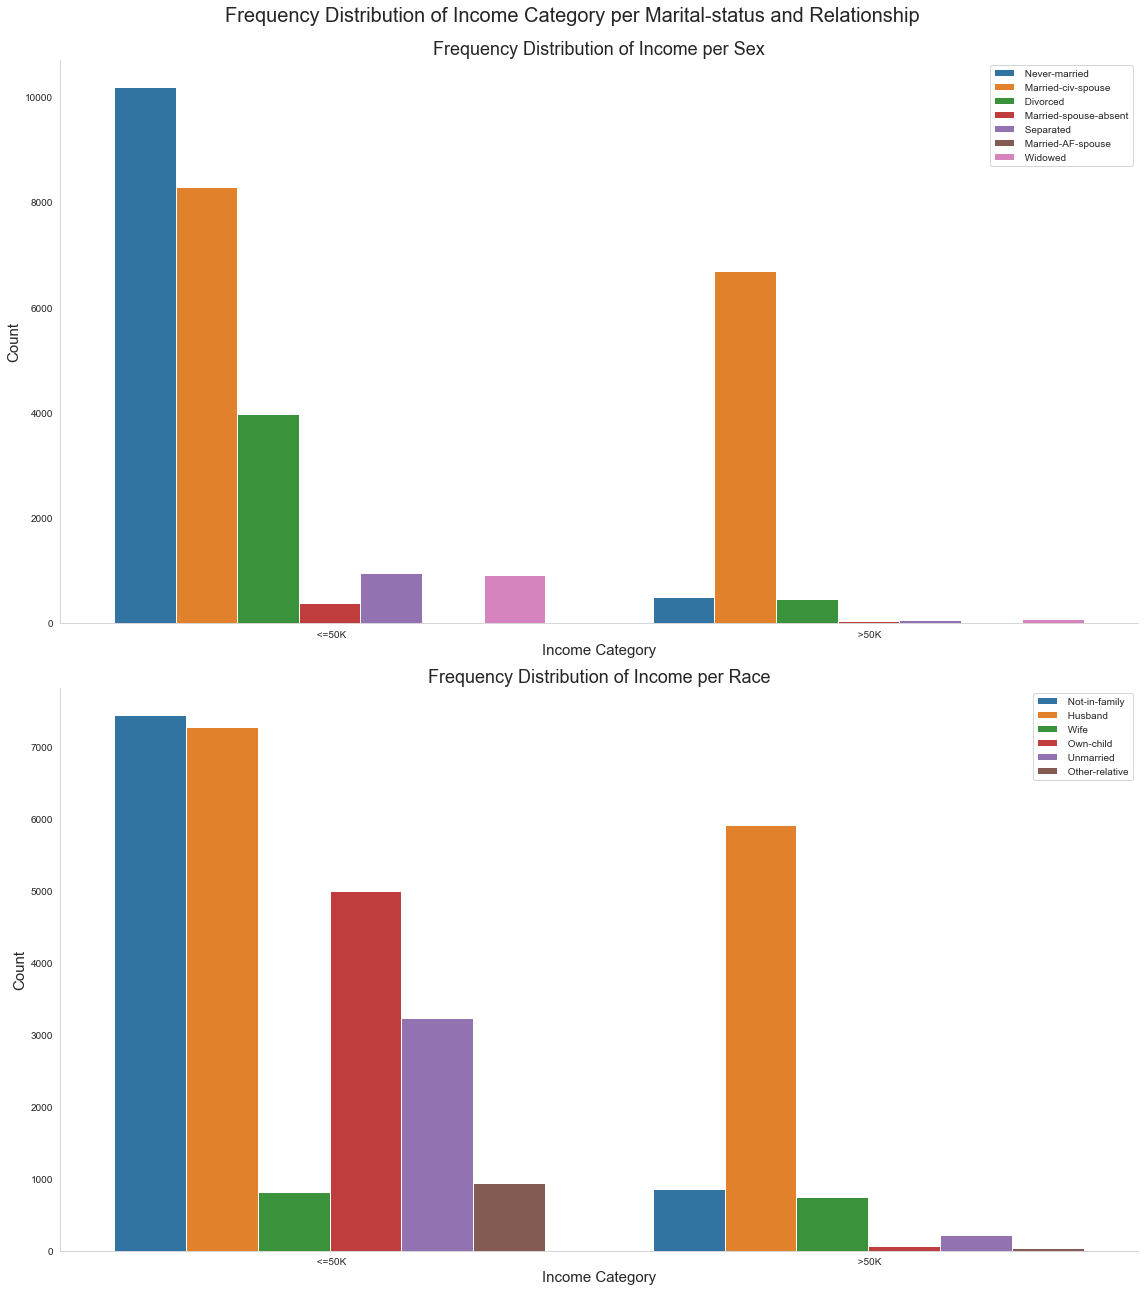

In [30]:
fig, (ax10, ax11) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Income Category per Marital-status and Relationship", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax10 = sns.countplot(x='income', hue='marital-status',ax=ax10, data=Income)
ax10.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax10.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('Frequency Distribution of Income per Sex',fontsize=18, fontweight='normal')
ax10.legend(loc='best')


#Plot 2
ax11 = sns.countplot(x='income', hue='relationship',ax=ax11, data=Income)
ax11.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax11.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.set_title('Frequency Distribution of Income per Race',fontsize=18, fontweight='normal')
ax11.legend(loc='best')

plt.tight_layout()

### Income per Age

### Sex based

In [ ]:
ax13 = sns.catplot(x="income", y="age", col="sex", data=Income, height=8, aspect=1)
plt.tight_layout()

### Prepare Data For Machine Learning

### Imbalance Target Feature Data Checking

In [31]:
print('Distinct value(s) of Income : ', Income['income'].unique())
print(Income['income'].value_counts()/float(len(Income)))

Distinct value(s) of Income :  [' <=50K' ' >50K']
 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64


 - It is rather an imbalanced data.
 - Accuracy will not be the best tool to measure performance of the model. Precision, Recall and F1 Score are preferable.

In [32]:
Income['income'] = Income['income'].replace([' <=50K',' >50K'],[0,1])
Income['income'] = Income['income'].astype(np.int64)

print('Distinc value(s) of Income : ', Income['income'].unique())
print(Income['income'].value_counts())

Distinc value(s) of Income :  [0 1]
0    24720
1     7841
Name: income, dtype: int64


### Splitting Dataset to Train dan Test Set

In [33]:
X = Income.drop(['income'], axis=1)
Y = Income['income']

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Splitting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

### Train and Test Set Profiling

In [35]:
print("Train set dimension :", X_train.ndim)
print("Train set shape :", X_train.shape)
print("Train set size :", X_train.size)

Train set dimension : 2
Train set shape : (24420, 14)
Train set size : 341880


In [36]:
print("Test set dimension :", X_test.ndim)
print("Test set shape :", X_test.shape)
print("Test set size :", X_test.size)

Test set dimension : 2
Test set shape : (8141, 14)
Test set size : 113974


### Defining Numerical and Categorical Features

In [37]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [38]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Data Preprocessing : Custom Pipeline Transformation

In [ ]:
pip install --upgrade category_encoders

### Categorical Encoder

In [39]:
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder


# Encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country'])
X_train = encoder.fit_transform(X_train)
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
6217,55,1,0,0,0,0,0,0,0,0,138594,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1977,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24569,35,0,1,0,0,0,0,0,0,0,150042,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5534,39,0,1,0,0,0,0,0,0,0,340091,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1726,55,0,1,0,0,0,0,0,0,0,199067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10136,36,0,0,1,0,0,0,0,0,0,151322,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,37,0,0,0,0,0,0,1,0,0,173192,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22637,53,0,0,1,0,0,0,0,0,0,284329,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10123,47,0,1,0,0,0,0,0,0,0,74305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5600,44,0,1,0,0,0,0,0,0,0,376072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,45,1,0,0,

In [40]:
# For Test Set
X_test = encoder.transform(X_test)
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
5627,35,0,0,0,1,0,0,0,0,0,215419,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29006,67,0,0,1,0,0,0,0,0,0,431426,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,20051,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10922,43,0,0,1,0,0,0,0,0,0,150528,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31192,31,0,1,0,0,0,0,0,0,0,128567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20253,56,0,0,1,0,0,0,0,0,0,144380,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15221,36,0,1,0,0,0,0,0,0,0,268620,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5344,61,0,0,0,0,0,1,0,0,0,226989,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22215,19,0,0,0,0,0,0,0,1,0,43887,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,40,0,1,0,0,0,0,0,0,0,193524,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,60,1,0,0,

### Feature Scaling

In [41]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
0,0.90,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.335870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.240570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.341497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.05,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [42]:
# For Test Set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
0,-0.10,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.303662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.101817,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,20051.0,0.0,-7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.30,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.236525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.419340,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.95,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.287704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Machine Learning Model on Training Set

In [43]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns = X_test.columns.get_level_values(0)

### Random Forest (Deafult Parameter)

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=50)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.9999590499590499
Train Precision 1.0
Train Recall 0.9998303071440693
Train F1 Score 0.9999151463725074
****************************************
******************Test*******************
Test Accuracy 0.8584940425009213
Test Precision 0.7406287787182587
Test Recall 0.6288501026694046
Test F1 Score 0.6801776790671848
*****************************************


### Random Forest (100 Estimators)

In [45]:
# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf100 = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf100.fit(X_train, y_train)
predictions = forest_clf100.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf100.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.9999590499590499
Train Precision 1.0
Train Recall 0.9998303071440693
Train F1 Score 0.9999151463725074
****************************************
******************Test*******************
Test Accuracy 0.8584940425009213
Test Precision 0.7406287787182587
Test Recall 0.6288501026694046
Test F1 Score 0.6801776790671848
*****************************************


### SGB Model

In [46]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = SGB_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8685094185094185
Train Precision 0.7891332470892626
Train Recall 0.621075852706601
Train F1 Score 0.6950906846453329
****************************************
******************Test*******************
Test Accuracy 0.8672153298120624
Test Precision 0.7787781350482315
Test Recall 0.6216632443531828
Test F1 Score 0.6914073651156152
*****************************************


### LightGBM Model

In [47]:
# Choosing Model
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = LGBM_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8891482391482392
Train Precision 0.8144492696407422
Train Recall 0.7001527235703376
Train F1 Score 0.7529884113514006
****************************************
******************Test*******************
Test Accuracy 0.8779019776440241
Test Precision 0.7846062052505967
Test Recall 0.6750513347022588
Test F1 Score 0.7257174392935983
*****************************************


### Find Importance Features with Random Forest Model

In [48]:
# view the feature scores using 100 estimators
forest_clf100 = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf100.fit(X_train, y_train)
predictions = forest_clf100.predict(X_train)

feature_scores = pd.Series(forest_clf100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores.to_string())

fnlwgt               1.587889e-01
age                  1.480789e-01
capital-gain         9.160502e-02
hours-per-week       8.567159e-02
marital-status_1     7.110905e-02
education-num        6.452824e-02
relationship_1       4.049177e-02
capital-loss         2.906818e-02
marital-status_4     2.522396e-02
occupation_1         1.781224e-02
occupation_4         1.427374e-02
education_3          1.176174e-02
sex_1                1.164632e-02
workclass_2          1.100866e-02
relationship_2       9.312187e-03
relationship_4       8.892350e-03
sex_2                8.578482e-03
workclass_3          8.431367e-03
education_4          8.394920e-03
occupation_6         7.321572e-03
occupation_2         7.203292e-03
education_1          7.199327e-03
relationship_5       7.124501e-03
occupation_3         7.008048e-03
race_1               6.472009e-03
workclass_1          6.468383e-03
native-country_1     6.135568e-03
occupation_8         6.101924e-03
workclass_4          6.055975e-03
education_2   

 - We can see that the most important feature is fnlwgt and least important feature is native_country_42.

### Find Importance Features with SGB Model

In [49]:
# view the feature scores using 100 estimators
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

feature_scores2 = pd.Series(SGB_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores2.to_string())

marital-status_1     0.383311
capital-gain         0.205704
education-num        0.190469
age                  0.063610
capital-loss         0.057249
hours-per-week       0.041025
occupation_1         0.015199
occupation_4         0.007597
occupation_12        0.005300
relationship_2       0.004834
occupation_2         0.004803
fnlwgt               0.003107
workclass_3          0.002388
sex_2                0.001516
occupation_10        0.001363
sex_1                0.001249
marital-status_7     0.001239
workclass_1          0.001071
workclass_7          0.000973
occupation_5         0.000786
relationship_1       0.000750
workclass_4          0.000721
occupation_13        0.000686
occupation_6         0.000627
race_1               0.000569
education_3          0.000489
native-country_1     0.000385
relationship_3       0.000353
education_10         0.000312
education_16         0.000210
occupation_7         0.000207
marital-status_4     0.000201
relationship_5       0.000192
native-cou

### Find Importances Features with LightGBM Model

In [50]:
# view the feature scores using 100 estimators
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

feature_scores3 = pd.Series(LGBM_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores3.to_string())

age                  491
fnlwgt               454
capital-gain         288
hours-per-week       266
capital-loss         260
education-num        188
marital-status_1      69
occupation_1          54
relationship_2        50
occupation_4          48
sex_1                 47
workclass_2           38
occupation_12         36
workclass_3           35
occupation_2          31
education_2           28
occupation_6          28
workclass_7           25
occupation_13         25
relationship_4        24
workclass_4           23
occupation_10         23
education_1           22
workclass_1           20
occupation_5          20
occupation_8          20
relationship_3        19
marital-status_4      18
occupation_3          18
relationship_1        17
relationship_6        17
native-country_1      16
marital-status_3      15
race_1                14
occupation_9          13
relationship_5        13
marital-status_5      12
occupation_7          12
race_3                11
workclass_5           11


### Explain and Interpert Model Using Shapley

In [ ]:
pip install shap

### Random Forest

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer1 = shap.TreeExplainer(forest_clf100)
shap_values1 = explainer1.shap_values(X_train)

# visualize the first prediction's explanation 
#shap.initjs()
#shap.force_plot(explainer1.expected_value, shap_values1[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer1.expected_value, shap_values1, X_train)

In [ ]:
# View Shap Feature Importances
shap_values1 = shap.TreeExplainer(forest_clf100).shap_values(X_train)
shap.summary_plot(shap_values1, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values1, X_train)

### SGB Model

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer2 = shap.TreeExplainer(SGB_clf)
shap_values2 = explainer1.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer2.expected_value, shap_values2, X_train)

In [ ]:
# View Shap Feature Importances
shap_values2 = shap.TreeExplainer(SGB_clf).shap_values(X_train)
shap.summary_plot(shap_values2, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values2, X_train)

### LightGBM Model

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer3 = shap.TreeExplainer(LGBM_clf)
shap_values3 = explainer3.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer3.expected_value, shap_values3, X_train)

In [ ]:
# View Shap Feature Importances
shap_values3 = shap.TreeExplainer(LGBM_clf).shap_values(X_train)
shap.summary_plot(shap_values3, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values3, X_train)

### Visualize Feature Importance Using Yellowbrick

In [ ]:
pip install yellowbrick

In [ ]:
# Import model and visualizer
from yellowbrick.model_selection import FeatureImportances

# Instantiate model and visualizer
forest_clf100 = RandomForestClassifier(random_state=50,n_estimators=100)
visualizer = FeatureImportances(forest_clf100)

# Fit and display visualizer
visualizer.fit(X_train, y_train)
visualizer.show();

### Build LightGBM Model Based on Selected Features

In [51]:
# Drop the least important feature from X_train and X_test

X_train = X_train.drop(['workclass_9',
'native-country_31',      
'native-country_26',      
'native-country_32',      
'native-country_30',      
'native-country_34',      
'native-country_29',      
'native-country_36',      
'native-country_38',      
'native-country_39',      
'native-country_40',      
'native-country_41',      
'native-country_28',      
'native-country_33',
'marital-status_7',      
'native-country_25',                  
'education_16',           
'education_15',           
'education_14',           
'education_13',           
'occupation_15',          
'education_9',            
'workclass_8',            
'native-country_24',      
'native-country_4',       
'native-country_11',      
'native-country_12',      
'native-country_15',      
'native-country_17',      
'native-country_23',     
'native-country_42'], axis=1)

X_test = X_test.drop(['workclass_9',
'native-country_31',      
'native-country_26',      
'native-country_32',      
'native-country_30',      
'native-country_34',      
'native-country_29',      
'native-country_36',      
'native-country_38',      
'native-country_39',      
'native-country_40',      
'native-country_41',      
'native-country_28',      
'native-country_33',
'marital-status_7',      
'native-country_25',                  
'education_16',           
'education_15',           
'education_14',           
'education_13',           
'occupation_15',          
'education_9',            
'workclass_8',            
'native-country_24',      
'native-country_4',       
'native-country_11',      
'native-country_12',      
'native-country_15',      
'native-country_17',      
'native-country_23',     
'native-country_42'], axis=1)  

In [52]:
# Choosing Model
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = LGBM_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8891482391482392
Train Precision 0.8144492696407422
Train Recall 0.7001527235703376
Train F1 Score 0.7529884113514006
****************************************
******************Test*******************
Test Accuracy 0.8779019776440241
Test Precision 0.7846062052505967
Test Recall 0.6750513347022588
Test F1 Score 0.7257174392935983
*****************************************


### Confusion Matrix

<AxesSubplot:>

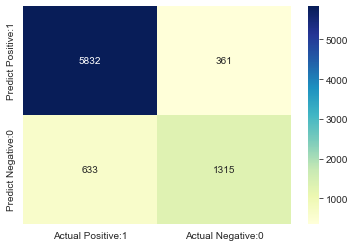

In [53]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, final_predictions)

# Visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report

In [54]:
from sklearn.metrics import classification_report

print('************** Classification Reports ****************')
print(classification_report(y_test, final_predictions))
print('******************************************************')

************** Classification Reports ****************
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6193
           1       0.78      0.68      0.73      1948

    accuracy                           0.88      8141
   macro avg       0.84      0.81      0.82      8141
weighted avg       0.87      0.88      0.87      8141

******************************************************
